# Get Masks from Files

----------------------------------------------------------------------------------------------------------------

## 1. Your Info

1. Input your Information Commons (IC) username in place of `miramontess`. Keep the quotation marks (your username should be your last name + first letter of first name: miramontes + silvia = miramontess for me).

In [1]:
myUsername = 'miramontess' # YOUR USERNAME HERE

- Let's load the necessary python scripts into your home environment. Run the cell below.

In [2]:
# RUN THIS CELL -- do not change

# aws dependencies
import boto3
import os 

# downloading scripts from your jupyter s3 bucket
key_prefix = "jupyter/" + myUsername + "/tools/code/"
s3 = boto3.resource('s3')
s3.meta.client.download_file('bchsi-spark02', key_prefix + "maskGenerator.py", "maskGenerator.py")
s3.meta.client.download_file('bchsi-spark02', key_prefix + "fileManager.py", "fileManager.py")

# loading scripts
import maskGenerator, fileManager
%run -i 'fileManager.py'
%run -i 'maskGenerator.py'

ModuleNotFoundError: No module named 'skimage'

----------------------------------------------------------------------------------------------------------------

## 2. Your Data

2. Input the os path to your data folder/directory (one per region) in the variable `region_#`. The path you type should be the "address" to the directory in which all your **compliant**`.tif` files are located in your **personal** s3 bucket.
    - For example, below I have saved my data inside the folder `data` and `IanTonya_test`. Whatever is inside `IanTonya_test` folder are `.tif` images.
    - When typing yout path make sure to keep the format `dir1/dir2` (no forward slash at the end).
    - Thus, `region_#` is a path to the location of the data you wish to count (inside your personal s3 bucket).
- **If uploading more than one region/folder:**
    - The commented out lines (`region_2`, `region_3`...) are placeholders in case you wish to include more than one folder/region.
    - Thus, if you have other regions, uncomment each line accordingly. Make sure to type the correct address to where we can find your `.tif` files.
    
    *Note: If you have more than 1 region, create new variables `region_2`, `region_3` for each of these folders. See example in the code.*

In [4]:
region_1 = 'mydata/reg1' # path to your personal s3 bucket (where is your data?)

region_2 = 'mydata/reg2'
region_3 = 'mydata/reg3'
region_4 = 'mydata/reg4'
region_5 = 'mydata/reg5'
region_6 = 'mydata/reg6'
region_7 = 'mydata/reg7'

#reg...='data/reg...'

3. Once you've typed the path(s) above, you will need to obtain these files. You will achieve this by passing in the `region_#` in the second argument of the `get_files` function.

In [5]:
# one region only
data_region1 = get_files(myUsername, region_1) # <---HERE (in place of region_1)
data_region1 = glob.glob(data_region1 + "*.tif")

# in case you are counting more than one region...

data_region2 = get_files(myUsername, region_2)
data_region2 = glob.glob(data_region2 + "*.tif")

data_region3 = get_files(myUsername, region_3)
data_region3 = glob.glob(data_region3 + "*.tif")

data_region4 = get_files(myUsername, region_4)
data_region4 = glob.glob(data_region4 + "*.tif")

data_region5=get_files(myUsername, region_5)
data_region5= glob.glob(data_region5 + '*.tif')
                       
data_region6=get_files(myUsername, region_6)
data_region6= glob.glob(data_region6 + '*.tif')

data_region7=get_files(myUsername, region_7)
data_region7= glob.glob(data_region7 + '*.tif')

Done!
     
Your Files are here: home/miramontess/mydata/reg1/
Done!
     
Your Files are here: home/miramontess/mydata/reg2/
Done!
     
Your Files are here: home/miramontess/mydata/reg3/
Done!
     
Your Files are here: home/miramontess/mydata/reg4/
Done!
     
Your Files are here: home/miramontess/mydata/reg5/
Done!
     
Your Files are here: home/miramontess/mydata/reg6/
Done!
     
Your Files are here: home/miramontess/mydata/reg7/


----------------------------------------------------------------------------------------------------------------

## 3. Model Loading
- Model is to be loaded to this node to properly predict/generate masks.
- Run the cell below to get the model ready.

In [6]:
# RUN THIS CELL -- do not change

model_loc = 'tools'
tool_loc = get_files(myUsername, model_loc)
model = tool_loc + 'code/Models/OneChannel-b15-e28/OneChannel-b15-e28.h5'
print('Everything is now accessible')

Done!
     
Your Files are here: home/miramontess/tools/
Everything is now accessible


----------------------------------------------------------------------------------------------------------------

## 4. Generate Masks

It is important to note that within the algorithm there are some parameters that can affect the output of the masks generated by the model. Mainly, the deletion of small objects (smaller than a neuron), and the filling of holes (in case a detected object/neuron looks like a donut). Do not fret because these can be changed!

To prevent the over-deletion of neurons, it is good to have an estimate for the size of the neurons that you expect, as well as the are the areas of the detections you wish to fill.
Below you will find the documented definitions of the parameters you can alter. 

- `remove_small_holes`:
    - (`smallh_`) The maximum area, in pixels, of a contiguous hole that will be filled.
- `min_size_area`:
    - (`min_area`) The smallest allowable object size.

In this case the set parameters are set in the cells below. Feel free to change these as you see fit after seeing the output of the `show_me()` cell.

1. Choose your parameters appropriate for region_1.

In [7]:
smallhole_ = 100
min_area = 35

2. Get Segmentations for your first region. Enter your path to the list of `.tif` files.

In [8]:
m_region1, inp_region1 = makeMasks(data_region1, model, min_area, smallhole_)

Working...
Your masks are ready!


**If after running the cell below you don't like what you see in terms of the paramenters we mentioned. Change them, and rerun the cells.**

Satisfied? If not, feel free to edit the parameters mentioned above...


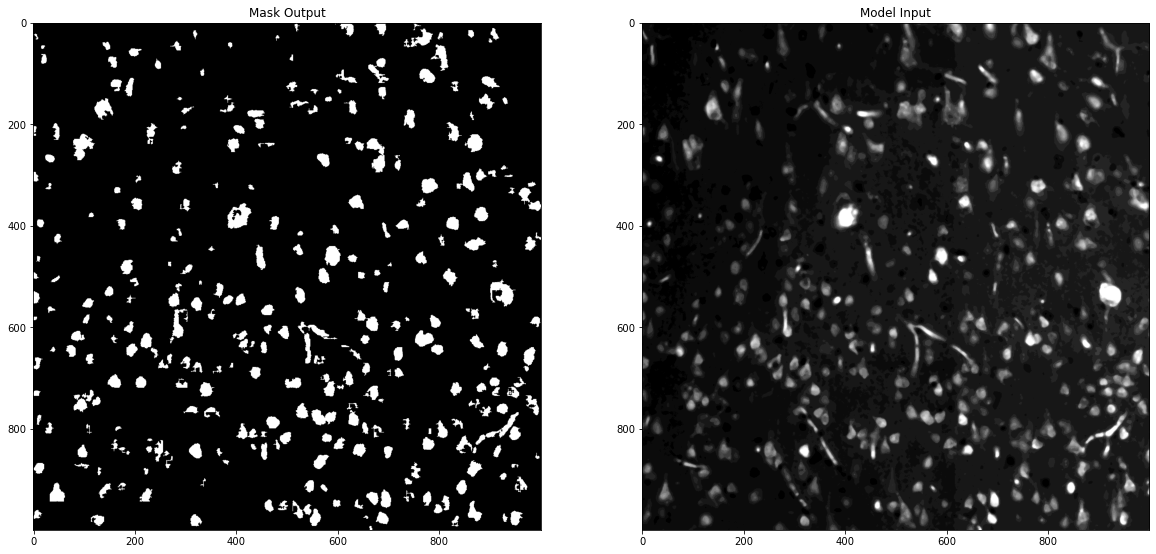

In [9]:
show_me(m_region1, inp_region1)

### More regions?
- Pick your parameters again
- Set your variables right
- Pass into the functions the correct variables that include your masks

1. Set your parameters

In [10]:
smallhole_=100
min_area = 35

2. Get segmentations for your first region. Enter the approrpriate variable `data_region#` for the data to be counted.

In [11]:
m_region2, inp_region2 = makeMasks(data_region2, model, min_area, smallhole_) # for data_region2, with parameters smallhole_ and min_area

Working...
Your masks are ready!


Satisfied? If not, feel free to edit the parameters mentioned above...


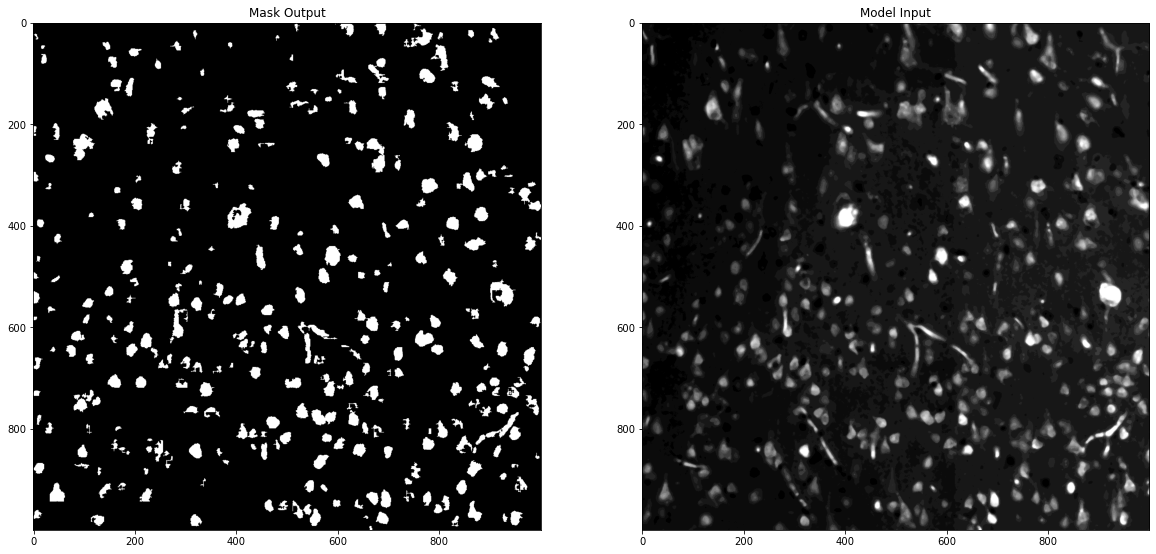

In [12]:
show_me(m_region2, inp_region2)

### Even more regions?

Set parameters again and pass in the approrpriate arguments.
- Each of the cells below will be for a different region. 

Working...
Your masks are ready!
Satisfied? If not, feel free to edit the parameters mentioned above...


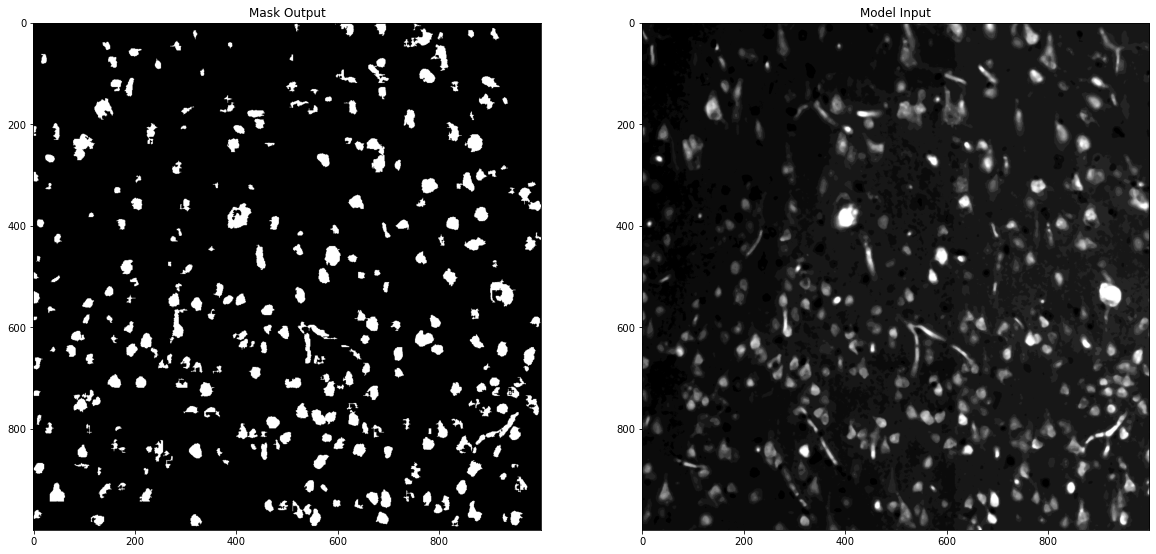

In [16]:
smallhole_= 100
min_area = 50
m_region3, inp_region3 = makeMasks(data_region3, model, min_area, smallhole_) # for data_region3, with parameters smallhole_ and min_area
show_me(m_region3, inp_region3)

- Even more regions...

Working...
Your masks are ready!
Satisfied? If not, feel free to edit the parameters mentioned above...


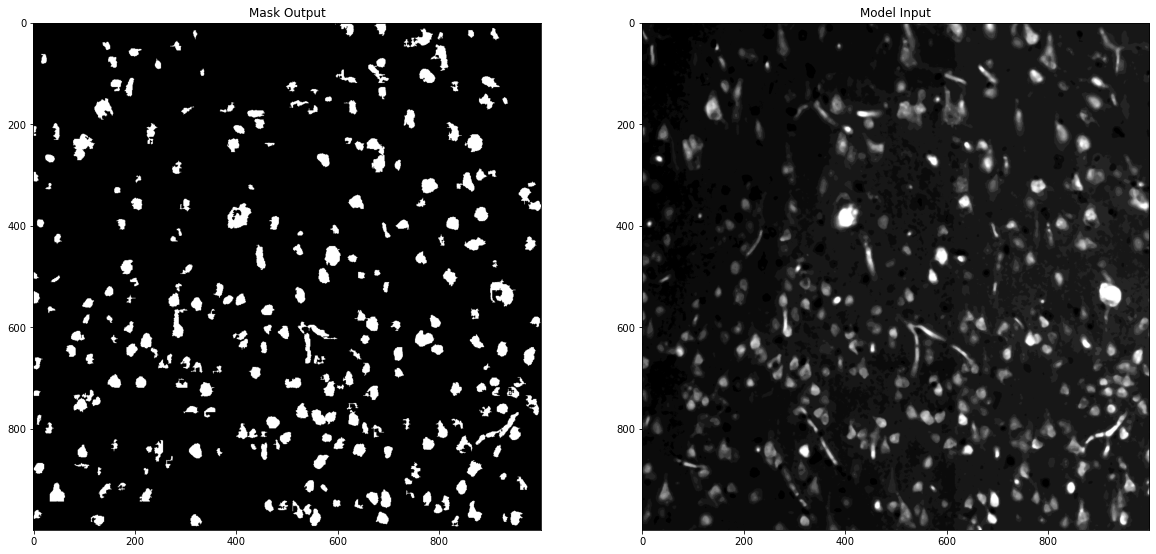

In [17]:
smallhole_= 100
min_area = 75
m_region4, inp_region4 = makeMasks(data_region4, model, min_area, smallhole_) # for data_region4, with parameters smallhole_ and min_area
show_me(m_region4, inp_region4)

In [ ]:
#smallhole_= 
#min_area =
#m_region5, inp_region5 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region5, with parameters smallhole_ and min_area
#show_me(m_region5, inp_region5)

In [ ]:
#smallhole_= 
#min_area =
#m_region6, inp_region6 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region6, with parameters smallhole_ and min_area
#show_me(m_region6, inp_region6)

In [ ]:
#smallhole_= 
#min_area =
#m_region7, inp_region7 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region7, with parameters smallhole_ and min_area
#show_me(m_region7, inp_region7)

In [ ]:
#smallhole_= 
#min_area =
#m_region8, inp_region8 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region8, with parameters smallhole_ and min_area
#show_me(m_region8, inp_region8)

In [ ]:
#smallhole_= 
#min_area =
#m_region9, inp_region9 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region9, with parameters smallhole_ and min_area
#show_me(m_region9, inp_region9)

In [ ]:
#smallhole_= 
#min_area =
#m_region10, inp_region10 = makeMasks(YOUR_REGION, model, min_area, smallhole_) # for data_region4, with parameters smallhole_ and min_area
#show_me(m_region10, inp_region10)

---------------------------------------------------------------------------------------

## 5. If satisfied, let's save your Masks!
All of the masks you have generated are saved in your home directoy (Jupyter Instance home). To check you can click on the plus sign on the top left corner to open a terminal window. 

To verify these are saved there, do the following: 

- Type `ls` and you should see the folder `data`.
- To navigating into `data` directory type `cd data`
- Type `ls` to see the list of directories available
- You should see a folder titled `Masks`
- Navigate into this folder by typing `cd Masks`
- Type `ls` to list the contents. 
- You should see a list of directories with the names of the regions you have uploaded.
- You can also navigate into each of the listed directories there to see the `*Mask.png` files.
- Each region has its own directory/folder. Inside of that folder you will finde the outputted Masks.

1. We will now save all of these Masks by syncing your data/Masks/* generated directory and files to your personal s3 bucket. 
    - **TYPE YOUR USERNAME below (in place of USERNAME)** 

In [18]:
!aws s3 cp data s3://bchsi-spark02/home/miramontess/ --recursive

upload: data/Masks/Silvia_NeuN_Composite_1000X1000_RGB/Silvia_NeuN_Composite_1000X1000_RGB-Mask.png to s3://bchsi-spark02/home/miramontess/Masks/Silvia_NeuN_Composite_1000X1000_RGB/Silvia_NeuN_Composite_1000X1000_RGB-Mask.png
upload: data/Masks/Silvia_NeuN_Composite_1000X1000_RGB (1)/Silvia_NeuN_Composite_1000X1000_RGB (1)-Mask.png to s3://bchsi-spark02/home/miramontess/Masks/Silvia_NeuN_Composite_1000X1000_RGB (1)/Silvia_NeuN_Composite_1000X1000_RGB (1)-Mask.png


- The generated images will appear under the directory `Masks` inside your personal s3 bucket.

2. Now we will place these images in your master node (Terminal/bash connected to IC). Afterwards, you will be able to save/download into your local machine. Make sure to delete your files from the master node.

    - Information Commons team prefers if you keep your master node's home directory clean.
    - Paste the following command in your terminal/bash (master node).
    - Change `USERNAME` to your IC username.
    - Change `folder_to_download` to the folder inside Masks you wish to download. 
    
        - `aws s3 cp s3://bchsi-spark02/home/USERNAME/Masks/folder_to_download . --recursive`

    - Now use cyberduck to save in your local machine.

## fin